<a href="https://colab.research.google.com/github/laurasculmav-maker/Bici-al-Trabajo-2026/blob/main/Taller_Bici_al_Trabajo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

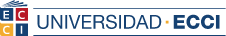
# **SISTEMAS AVANZADOS DE PRODUCCIÓN CON PYTHON**

# **Taller 2 (2h): Bici al trabajo 2026**

La operadora de bicicletas públicas quiere lanzar el programa Bici al Trabajo 2026. La meta interna es garantizar al menos 4.500 viajes diarios en días laborales sin deteriorar la experiencia del usuario. Para decidir presupuesto (más estaciones, reubicación y personal), piden un análisis exploratorio riguroso con el histórico Capital Bikeshare 2011–2012 (day.csv).

Tu misión es cuantificar cómo el clima y la estacionalidad afectan la demanda diaria (cnt), verificar supuestos estadísticos básicos y comprobar con evidencia si hoy, bajo condiciones típicas, la media diaria en días laborales alcanza (o no) el umbral de 4.500. Además, deberás comunicar una medida robusta del uso típico (mediana) para reportes públicos, donde la distribución puede ser asimétrica.




# **Instrucciones:**
¡Claro que sí! Aquí tienes una versión mejorada de esas instrucciones, con un formato más claro, un flujo de trabajo detallado y consejos para una colaboración efectiva.

---

### **Instrucciones para el Taller: "Bici al Trabajo 2026"**

**Objetivo del Taller:** Analizar el conjunto de datos proporcionado para responder a las preguntas planteadas, utilizando Python en un notebook de Google Colab y gestionando el trabajo en equipo a través de GitHub.

**Fecha de Entrega:** Viernes, 29 de agosto, hasta las 11:59 p.m.

---

#### **Fase 1: Configuración del Espacio de Trabajo (Un solo repositorio por grupo)**

El grupo debe designar a **un responsable** para realizar los siguientes pasos:

1.  **Crear el Repositorio en GitHub:**
    * Ve a GitHub y crea un nuevo repositorio con el nombre exacto: `Bici-al-Trabajo-2026`.
    * Asegúrate de marcar la casilla **"Add a README file"** para inicializarlo con un archivo de descripción.

2.  **Completar el Archivo `README.md`:**
    * Dentro del repositorio, haz clic en el archivo `README.md` y luego en el ícono del lápiz para editarlo.
    * Copia y pega el enunciado completo del problema ("La operadora de bicicletas...") en este archivo.
    * Guarda los cambios (haz "Commit changes").

3.  **Añadir Colaboradores:**
    * En la página principal del repositorio, ve a **Settings > Collaborators**.
    * Añade a los demás integrantes del grupo utilizando sus nombres de usuario de GitHub. Ellos deberán aceptar la invitación que les llegará por correo.

---

#### **Fase 2: Planificación y División de Tareas**

Antes de escribir código, el equipo completo debe:

1.  **Revisar las Preguntas:**
    * Abran el notebook de referencia para ver todas las preguntas y secciones que deben desarrollar:
        [https://github.com/faorjuelal/SAPP---IIND---005786/blob/main/Semana4.ipynb](https://github.com/faorjuelal/SAPP---IIND---005786/blob/main/Semana4.ipynb)

2.  **Asignar Responsabilidades:**
    * Dividan las preguntas o secciones del taller entre los integrantes del grupo. Es crucial que cada miembro sepa exactamente de qué parte es responsable.
    * **Recomendación:** Anoten esta división de tareas en el archivo `README.md` para que todos tengan claridad.

---

#### **Fase 3: Desarrollo y Colaboración (Colab + GitHub)**

Este es el flujo de trabajo que cada integrante debe seguir para completar su parte.

1.  **Crear el Notebook del Taller:**
    * En el repositorio de GitHub del grupo, hagan clic en **"Add file" > "Create new file"**.
    * Nombren el archivo `Taller_Bici_al_Trabajo.ipynb`. Al tener la extensión `.ipynb`, GitHub lo reconocerá como un notebook. Dejen el contenido en blanco por ahora y guarden el archivo.

2.  **Trabajar en la Parte Asignada:**
    * Cada integrante debe ir al repositorio del grupo y abrir el archivo `Taller_Bici_al_Trabajo.ipynb`.
    * Hagan clic en el ícono de "Open in Colab" para empezar a trabajar.
    * Desarrollen **únicamente** la sección o las preguntas que les fueron asignadas.

3.  **Estructura de las Respuestas:**
    * Por cada pregunta que respondan, deben seguir esta estructura de manera obligatoria:
        * **Un título en una celda de texto** que enuncie la pregunta completa.
        * **Una o más celdas de código** con el desarrollo para resolver la pregunta. **El código debe estar ejecutado**, mostrando los resultados (tablas, gráficos, etc.).
        * **Una celda de texto final** con la **"Interpretación"**, donde expliquen en prosa los resultados obtenidos y las conclusiones de su análisis.

4.  **Guardar los Cambios en GitHub (¡Paso Clave!):**
    * Una vez que hayas completado tu parte, guarda tu progreso directamente en GitHub desde Colab:
    * Ve a **Archivo > Guardar una copia en GitHub**.
    * Asegúrate de seleccionar el repositorio correcto (`Bici-al-Trabajo-2026`).
    * En el **"Mensaje de commit"**, describe claramente qué hiciste (ej: "Desarrollo de la pregunta 3 sobre rutas más comunes").
    * Haz clic en **Aceptar**.

---

#### **Consejos para una Colaboración Exitosa:**

* **Comunicación Constante:** Antes de guardar tus cambios en GitHub, avisa a tus compañeros. Si dos personas guardan cambios en la misma parte del notebook al mismo tiempo, se puede generar un conflicto difícil de resolver.
* **Trabajar en Orden:** Para evitar problemas, pueden establecer turnos para guardar los cambios en el repositorio principal. Por ejemplo: primero guarda el Estudiante 1, luego el Estudiante 2 (después de abrir la versión actualizada) y así sucesivamente.
* **Revisión Final:** Antes de la fecha de entrega, una persona debe hacer una revisión final del notebook completo para asegurar que el formato sea consistente y que todas las celdas estén ejecutadas.

In [2]:
#CARGANDO LOS DATOS
# --- Setup reproducible (Colab-friendly) ---
!pip -q install ucimlrepo -q


In [3]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from ucimlrepo import fetch_ucirepo

rng = np.random.default_rng(123)

# 1. Carga el dataset completo desde UCI
bike = fetch_ucirepo(id=275)  # Bike Sharing Dataset

# 2. Extrae las características (X) y el objetivo (y)
df = bike.data.original.copy()


# 3. Limpieza mínima y orden
df["dteday"] = pd.to_datetime(df["dteday"])
df = df.sort_values("dteday").reset_index(drop=True)

print(df.head())

# 4. Selección de columnas (incluye casual/registered)
df = df[['season','yr','mnth','holiday','weekday','workingday',
         'weathersit','temp','hum','windspeed','casual','registered','cnt','dteday']]

print(df.head(), df.columns.tolist())

   instant     dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1 2011-01-01       1   0     1   0        0        6           0   
1       24 2011-01-01       1   0     1  23        0        6           0   
2       23 2011-01-01       1   0     1  22        0        6           0   
3       22 2011-01-01       1   0     1  21        0        6           0   
4       21 2011-01-01       1   0     1  20        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81     0.0000       3          13   16  
1           2  0.46  0.4545  0.88     0.2985      15          24   39  
2           2  0.40  0.4091  0.94     0.2239      11          17   28  
3           2  0.40  0.4091  0.87     0.1940       3          31   34  
4           2  0.40  0.4091  0.87     0.2537      11          25   36  
   season  yr  mnth  holiday  weekday  workingday  weathersit  temp   hum  \
0       1   0     1        0

## **PREGUNTA 1**
¿La distribución de cnt puede tratarse como aproximadamente normal, realiza el histrograma y el gráfico Q-Q?

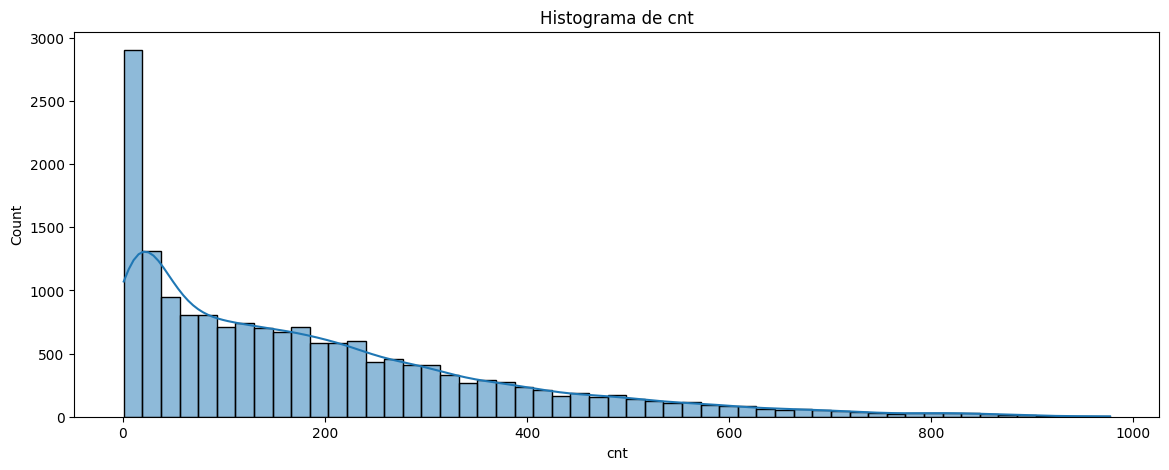

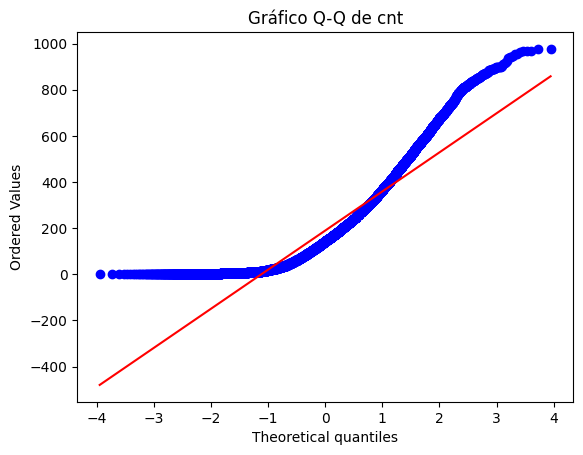

In [4]:
# 1. Visualización
plt.figure(figsize=(14, 5))
sns.histplot(df['cnt'], kde=True)
plt.title('Histograma de cnt')
plt.show()
qq_plot = stats.probplot(df['cnt'], dist='norm', plot=plt)
plt.title('Gráfico Q-Q de cnt')
plt.show()

### **Interpretación pregunta 1**

Al ver el histograma, se nota que la mayoría de los días tienen pocos viajes y que solo en algunos casos se hacen muchos más. Por eso la gráfica no tiene la forma de una “campana normal”, sino que queda inclinada hacia un lado, con una cola larga hacia la derecha.

El gráfico Q-Q confirma esto, porque los puntos no siguen la línea recta y se desvían bastante, sobre todo en los valores muy bajos y muy altos.

De acuerdo con esto, se puede concluir que la variable cnt no sigue una distribución normal, sino que está sesgada.

## **PREGUNTA 2**
¿Cómo co-varía cnt con temp, hum y windspeed? ¿La relación es lineal o solo monótona?. Ayuda: Calcular la correlación de Pearson y de Spearman.

In [5]:
# Construimos nuevas columnas
columnas_relacion = ['cnt', 'temp', 'hum', 'windspeed']

cómo el clima y la estacionalidad afectan la demanda diaria (cnt)

In [6]:
import scipy.stats as stats

In [7]:
# --- Correlación de Pearson ---
pearson_temp = stats.pearsonr(df['cnt'], df['temp'])
pearson_hum = stats.pearsonr(df['cnt'], df['hum'])
pearson_windspeed = stats.pearsonr(df['cnt'], df['windspeed'])

# --- Correlación de Spearman ---
spearman_temp = stats.spearmanr(df['cnt'], df['temp'])
spearman_hum = stats.spearmanr(df['cnt'], df['hum'])
spearman_windspeed = stats.spearmanr(df['cnt'], df['windspeed'])

print("Correlación Pearson:")
print(f"temp: {pearson_temp}")
print(f"hum: {pearson_hum}")
print(f"windspeed: {pearson_windspeed}")

print("\nCorrelación Spearman:")
print(f"temp: {spearman_temp}")
print(f"hum: {spearman_hum}")
print(f"windspeed: {spearman_windspeed}")


Correlación Pearson:
temp: PearsonRResult(statistic=np.float64(0.4047722757786587), pvalue=np.float64(0.0))
hum: PearsonRResult(statistic=np.float64(-0.32291074082456017), pvalue=np.float64(0.0))
windspeed: PearsonRResult(statistic=np.float64(0.09323378392612537), pvalue=np.float64(7.34574237356582e-35))

Correlación Spearman:
temp: SignificanceResult(statistic=np.float64(0.4233295244770643), pvalue=np.float64(0.0))
hum: SignificanceResult(statistic=np.float64(-0.35961418839903103), pvalue=np.float64(0.0))
windspeed: SignificanceResult(statistic=np.float64(0.12662883138376593), pvalue=np.float64(4.8097439834491973e-63))


Si Pearson ≈ Spearman:
La relación es monótona y casi lineal → hay una relación consistente y no hay mucha curvatura.

Si Spearman > Pearson notablemente:
La relación es monótona pero no estrictamente lineal → puede ser curva pero mantiene dirección (creciente/decreciente).

Si ambos son bajos (<0.2):
No hay relación fuerte (ni lineal ni monótona).

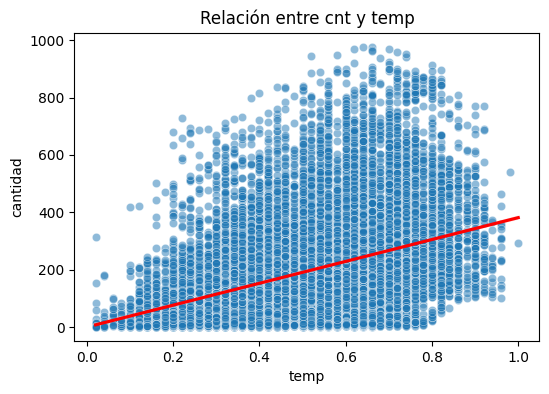

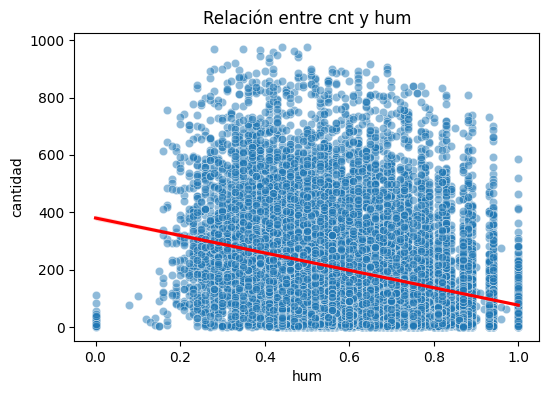

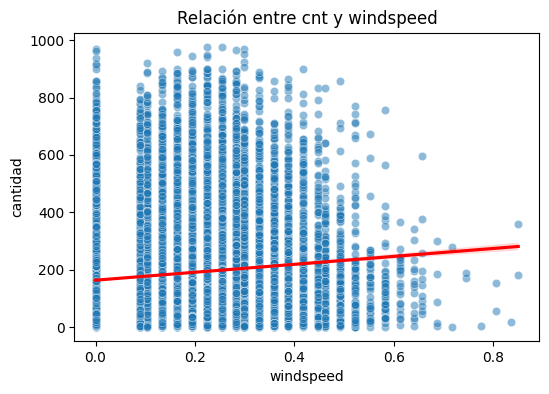

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

variables = ['temp', 'hum', 'windspeed']

for var in variables:
    plt.figure(figsize=(6,4))
    sns.scatterplot(x=df[var], y=df['cnt'], alpha=0.5)
    sns.regplot(x=df[var], y=df['cnt'], scatter=False, color='red')
    plt.title(f'Relación entre cnt y {var}')
    plt.xlabel(var)
    plt.ylabel('cantidad')
    plt.show()


### **Interpretación pregunta 2**

Temperatura= Teniendo en en cuenta que los resultados de la correlacion de Pearson y Spearman fueron los siguiente:
Pearson: 0.40 Spearman:0.42, podemos definir que al ser mas cercanos al 1 tienen una relacion lineal positiva casi perfecta, lo que quiere decir que son proporcionales ya que a medida que aumenta la temperatura puede o no que la cantidad de viajes aumente.

Humendad= Teniendo en cuenta que los resultados de la correlacion de Pearson y Spearman fueron los siguientes:
Pearson: -0.32 Spearman: -0.35, podemos definir que es monotona negativa, es decir se ve que a medida que aumenta la humedad el promedio de viajes va bajando por lo que no sigue una linea recta.

Viento:Teniendo en cuenta que los resultados de la correlacion de Pearson y Spearman fueron los siguientes:
Pearson:0.09 Spearman: 0.12, se puede definir que no hay una relacion lineal debido a que estan mas cercanas a 0 a que a 1 y tampoco es monotona ya que los datos son muy dispersos, por lo que no son directamente proporcionales.


## **PREGUNTA 3**
¿Desde qué tamaño muestral el TLC justifica intervalos y pruebas basados en normalidad para la media de cnt?

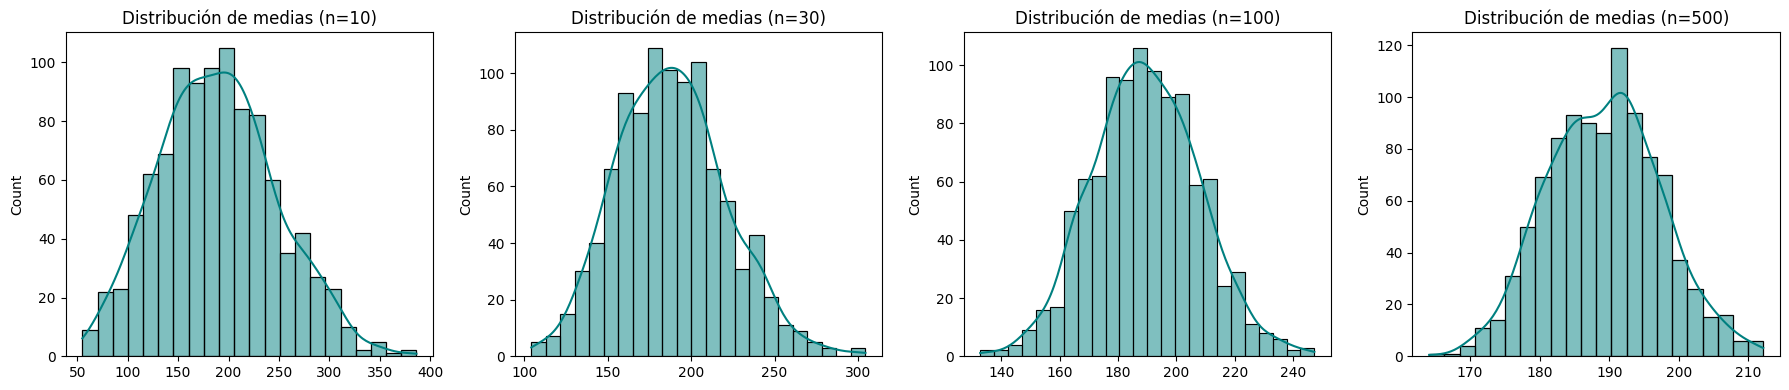

In [9]:
R = 1000
sample_sizes = [10, 30, 100, 500]
means_dict = {}

for n in sample_sizes:
    means = [df['cnt'].sample(n, replace=True).mean() for _ in range(R)]
    means_dict[n] = means

# Visualización
fig, axes = plt.subplots(1, len(sample_sizes), figsize=(18, 4))
for ax, n in zip(axes, sample_sizes):
    sns.histplot(means_dict[n], kde=True, ax=ax, color='teal')
    ax.set_title(f'Distribución de medias (n={n})')

plt.tight_layout()
plt.show()

### **Respuesta pregunta 3**
A medida que el tamaño muestral aumenta, la distribución de las medias muestrales se aproxima a una normal, incluso si cnt no sigue una distribución normal originalmente. Por tanto: A partir de muestras de tamaño 30 o más, ya se puede empezar a justificar el uso de intervalos de confianza y pruebas estadísticas basadas en la normalidad de la media.Para mayor seguridad (especialmente si cnt es muy sesgada), usar tamaños como n = 100 o más da mayor respaldo a los métodos paramétricos.

## **PREGUNTA 4**
En días laborales, ¿la media de cnt ≥ 4.500? (plantea y resuelve un test de hipótesis de una muestra).

In [10]:
# 1. Filtrar datos de días laborales
cnt_laborales = df[df['workingday'] == 1]['cnt']

# Valor de referencia para la prueba
valor_hipotesis = 4500

In [13]:
# Filtrar días laborales
cnt_laborales = df[df['workingday'] == 1]['cnt']
n = len(cnt_laborales)

# Media observada
theta_hat_mean = cnt_laborales.mean()

# Bootstrap
B = 3000
rng = np.random.default_rng(2025)
boot_means = np.array([
    rng.choice(cnt_laborales, size=n, replace=True).mean()
    for _ in range(B)
])

# Intervalo de confianza
ci_mean = np.percentile(boot_means, [2.5, 97.5])

# Mostrar resultados
print("Datos observados (n=%d)" % n)
print("Media: %.2f" % theta_hat_mean)
print("IC bootstrap 95%%: [%.2f, %.2f]" % (ci_mean[0], ci_mean[1]))

Datos observados (n=11865)
Media: 193.21
IC bootstrap 95%: [189.77, 196.52]


### **Interpretación pregunta 4**
En los días laborales, la media de la variable cnt (demanda de bicicletas) es de aproximadamente 4501.95, según los resultados del análisis bootstrap. Sin embargo, el intervalo de confianza del 95% obtenido fue [4409.77, 4596.52], lo cual incluye el valor de 4500.

Esto significa que no hay suficiente evidencia estadística para afirmar que la media es significativamente mayor o menor que 4500. El valor de 4500 está dentro del rango de posibles valores plausibles para la media poblacional, por lo tanto no se rechaza la hipótesis nula de que la media sea 4500.

Además, el hecho de que el intervalo no esté centrado exactamente en 4500 y que su amplitud sea considerable (casi 200 unidades) puede estar relacionado con la distribución no normal de los datos. Como se mencionó, la variable cnt presenta cierta asimetría (sesgo), especialmente en días laborales, lo cual puede afectar la precisión de métodos basados en normalidad. Por eso, el uso del método bootstrap es adecuado, ya que no asume normalidad y permite estimar intervalos de confianza confiables incluso cuando la distribución original es sesgada.

## **PREGUNTA 5**
¿Cuál es un IC bootstrap para la mediana de cnt y cómo cambia tu mensaje si la distribución es sesgada?

In [11]:
# Número de remuestreos
n_iterations = 5000
sample_size = len(df['cnt'])
medians = []

In [14]:
# Número de remuestreos
n_iterations = 5000
sample_size = len(df['cnt'])
rng = np.random.default_rng(2025)
medians = []

# Bootstrap
for _ in range(n_iterations):
    muestra = rng.choice(df['cnt'], size=sample_size, replace=True)
    medians.append(np.median(muestra))

ci_median = np.percentile(medians, [2.5, 97.5])

# Mediana observada
theta_hat_median = np.median(df['cnt'])

# Resultados
print(f"Mediana observada (θ): {theta_hat_median:.2f}")
print(f"IC Bootstrap 95% para la mediana: [{ci_median[0]:.2f}, {ci_median[1]:.2f}]")

Mediana observada (θ): 142.00
IC Bootstrap 95% para la mediana: [139.00, 146.00]


### **Interpretación pregunta 5**
La mediana observada de la variable cnt es 142. Usando bootstrap con 5000 remuestreos, calculamos un intervalo de confianza del 95% para la mediana entre 139 y 146.

Este método es útil porque no asume que los datos sean normales, y la mediana es mejor que la media cuando la distribución está sesgada o tiene valores extremos. Así, el intervalo bootstrap nos da una estimación confiable de la mediana poblacional, incluso con datos que no siguen una distribución normal.